In [261]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

In [262]:
!pip install optuna

In [263]:
Fire_Dataset_Path = Path("../cours/Dataset")

In [264]:
PNG_Path = list(Fire_Dataset_Path.glob(r"*/*.jpg"))

In [265]:
print(PNG_Path)

[WindowsPath('../cours/Dataset/Fire/fire1.jpg'), WindowsPath('../cours/Dataset/Fire/fire10.jpg'), WindowsPath('../cours/Dataset/Fire/fire100.jpg'), WindowsPath('../cours/Dataset/Fire/fire1000.jpg'), WindowsPath('../cours/Dataset/Fire/fire1001.jpg'), WindowsPath('../cours/Dataset/Fire/fire1002.jpg'), WindowsPath('../cours/Dataset/Fire/fire1003.jpg'), WindowsPath('../cours/Dataset/Fire/fire1004.jpg'), WindowsPath('../cours/Dataset/Fire/fire1005.jpg'), WindowsPath('../cours/Dataset/Fire/fire1006.jpg'), WindowsPath('../cours/Dataset/Fire/fire1007.jpg'), WindowsPath('../cours/Dataset/Fire/fire1008.jpg'), WindowsPath('../cours/Dataset/Fire/fire1009.jpg'), WindowsPath('../cours/Dataset/Fire/fire101.jpg'), WindowsPath('../cours/Dataset/Fire/fire1010.jpg'), WindowsPath('../cours/Dataset/Fire/fire1011.jpg'), WindowsPath('../cours/Dataset/Fire/fire1012.jpg'), WindowsPath('../cours/Dataset/Fire/fire1013.jpg'), WindowsPath('../cours/Dataset/Fire/fire1014.jpg'), WindowsPath('../cours/Dataset/Fire/fi

In [266]:
print(os.path.split(os.path.split(PNG_Path[1])[0])[1])

Fire


In [267]:
PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],PNG_Path))

In [268]:
print("FIRE: ", PNG_Labels.count("Fire"))
print("NO_FIRE: ", PNG_Labels.count("NoFire"))

FIRE:  1124
NO_FIRE:  1300


## Transforming it into series Structure

In [269]:
JPG_Path_Series = pd.Series(PNG_Path,name="JPG").astype(str)
JPG_Labels_Series = pd.Series(PNG_Labels,name="CATEGORY")

In [270]:
print(JPG_Path_Series)

0             ..\cours\Dataset\Fire\fire1.jpg
1            ..\cours\Dataset\Fire\fire10.jpg
2           ..\cours\Dataset\Fire\fire100.jpg
3          ..\cours\Dataset\Fire\fire1000.jpg
4          ..\cours\Dataset\Fire\fire1001.jpg
                        ...                  
2419    ..\cours\Dataset\NoFire\nofire995.jpg
2420    ..\cours\Dataset\NoFire\nofire996.jpg
2421    ..\cours\Dataset\NoFire\nofire997.jpg
2422    ..\cours\Dataset\NoFire\nofire998.jpg
2423    ..\cours\Dataset\NoFire\nofire999.jpg
Name: JPG, Length: 2424, dtype: object


In [271]:
print(JPG_Labels_Series)

0         Fire
1         Fire
2         Fire
3         Fire
4         Fire
         ...  
2419    NoFire
2420    NoFire
2421    NoFire
2422    NoFire
2423    NoFire
Name: CATEGORY, Length: 2424, dtype: object


In [272]:
JPG_Labels_Series.replace({"non_fire_images":"NO_FIRE","fire_images":"FIRE"},inplace=True)

In [273]:
print(JPG_Labels_Series)

0         Fire
1         Fire
2         Fire
3         Fire
4         Fire
         ...  
2419    NoFire
2420    NoFire
2421    NoFire
2422    NoFire
2423    NoFire
Name: CATEGORY, Length: 2424, dtype: object


## Transformation en Structure de données

In [274]:
Main_Train_Data = pd.concat([JPG_Path_Series, JPG_Labels_Series],axis=1)

In [275]:
print(Main_Train_Data.head(-1))

                                        JPG CATEGORY
0           ..\cours\Dataset\Fire\fire1.jpg     Fire
1          ..\cours\Dataset\Fire\fire10.jpg     Fire
2         ..\cours\Dataset\Fire\fire100.jpg     Fire
3        ..\cours\Dataset\Fire\fire1000.jpg     Fire
4        ..\cours\Dataset\Fire\fire1001.jpg     Fire
...                                     ...      ...
2418  ..\cours\Dataset\NoFire\nofire994.jpg   NoFire
2419  ..\cours\Dataset\NoFire\nofire995.jpg   NoFire
2420  ..\cours\Dataset\NoFire\nofire996.jpg   NoFire
2421  ..\cours\Dataset\NoFire\nofire997.jpg   NoFire
2422  ..\cours\Dataset\NoFire\nofire998.jpg   NoFire

[2423 rows x 2 columns]


In [276]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)

In [277]:
print(Main_Train_Data.head(-1))

                                        JPG CATEGORY
0     ..\cours\Dataset\NoFire\nofire141.jpg   NoFire
1     ..\cours\Dataset\NoFire\nofire746.jpg   NoFire
2     ..\cours\Dataset\NoFire\nofire367.jpg   NoFire
3         ..\cours\Dataset\Fire\fire626.jpg     Fire
4     ..\cours\Dataset\NoFire\nofire280.jpg   NoFire
...                                     ...      ...
2418  ..\cours\Dataset\NoFire\nofire385.jpg   NoFire
2419  ..\cours\Dataset\NoFire\nofire723.jpg   NoFire
2420  ..\cours\Dataset\NoFire\nofire633.jpg   NoFire
2421      ..\cours\Dataset\Fire\fire594.jpg     Fire
2422      ..\cours\Dataset\Fire\fire972.jpg     Fire

[2423 rows x 2 columns]


In [278]:
print(Main_Train_Data["JPG"][2])
print(Main_Train_Data["CATEGORY"][2])
print(Main_Train_Data["JPG"][200])
print(Main_Train_Data["CATEGORY"][200])
print(Main_Train_Data["JPG"][45])
print(Main_Train_Data["CATEGORY"][45])
print(Main_Train_Data["JPG"][852])
print(Main_Train_Data["CATEGORY"][852])

..\cours\Dataset\NoFire\nofire367.jpg
NoFire
..\cours\Dataset\Fire\fire859.jpg
Fire
..\cours\Dataset\Fire\fire572.jpg
Fire
..\cours\Dataset\Fire\fire354.jpg
Fire


In [279]:
print(Main_Train_Data.head(-1))

                                        JPG CATEGORY
0     ..\cours\Dataset\NoFire\nofire141.jpg   NoFire
1     ..\cours\Dataset\NoFire\nofire746.jpg   NoFire
2     ..\cours\Dataset\NoFire\nofire367.jpg   NoFire
3         ..\cours\Dataset\Fire\fire626.jpg     Fire
4     ..\cours\Dataset\NoFire\nofire280.jpg   NoFire
...                                     ...      ...
2418  ..\cours\Dataset\NoFire\nofire385.jpg   NoFire
2419  ..\cours\Dataset\NoFire\nofire723.jpg   NoFire
2420  ..\cours\Dataset\NoFire\nofire633.jpg   NoFire
2421      ..\cours\Dataset\Fire\fire594.jpg     Fire
2422      ..\cours\Dataset\Fire\fire972.jpg     Fire

[2423 rows x 2 columns]


## Visualization

In [280]:
print(Main_Train_Data.head(-1))

                                        JPG CATEGORY
0     ..\cours\Dataset\NoFire\nofire141.jpg   NoFire
1     ..\cours\Dataset\NoFire\nofire746.jpg   NoFire
2     ..\cours\Dataset\NoFire\nofire367.jpg   NoFire
3         ..\cours\Dataset\Fire\fire626.jpg     Fire
4     ..\cours\Dataset\NoFire\nofire280.jpg   NoFire
...                                     ...      ...
2418  ..\cours\Dataset\NoFire\nofire385.jpg   NoFire
2419  ..\cours\Dataset\NoFire\nofire723.jpg   NoFire
2420  ..\cours\Dataset\NoFire\nofire633.jpg   NoFire
2421      ..\cours\Dataset\Fire\fire594.jpg     Fire
2422      ..\cours\Dataset\Fire\fire972.jpg     Fire

[2423 rows x 2 columns]


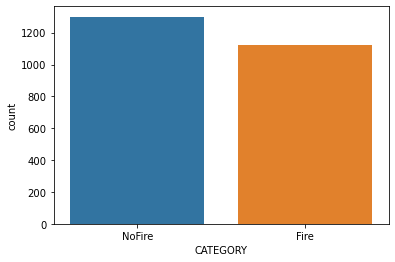

In [281]:
sns.countplot(Main_Train_Data["CATEGORY"])
plt.show()

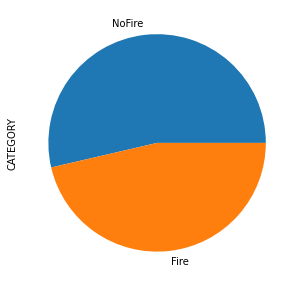

In [282]:
Main_Train_Data['CATEGORY'].value_counts().plot.pie(figsize=(5,5))
plt.show()

Text(0.5, 1.0, 'NoFire')

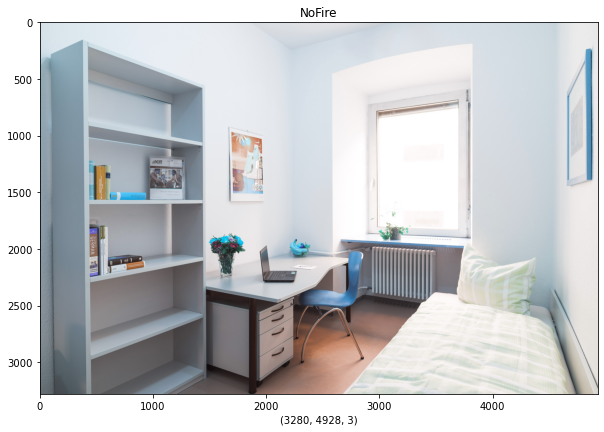

In [283]:
figure = plt.figure(figsize=(10,10))
x = cv2.imread(Main_Train_Data["JPG"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Train_Data["CATEGORY"][0])

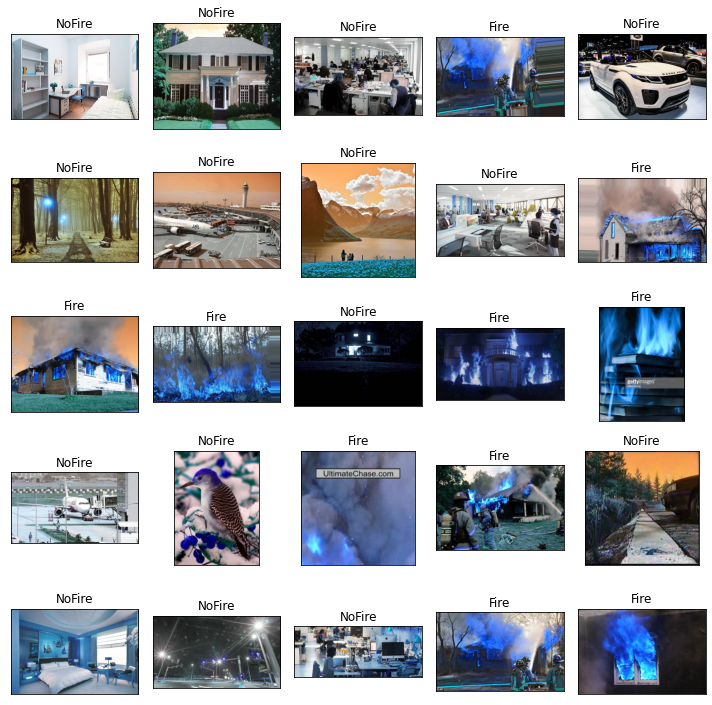

In [284]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(cv2.imread(Main_Train_Data["JPG"][i]))
    ax.set_title(Main_Train_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

## Data augmentation

In [285]:
Train_Generator = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.3,
                                    zoom_range=0.2,
                                    brightness_range=[0.2,0.9],
                                    rotation_range=30,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    fill_mode="nearest",
                                    validation_split=0.1)

In [286]:
Test_Generator = ImageDataGenerator(rescale=1./255)

## Splitting train and test

In [287]:
Train_Data,Test_Data = train_test_split(Main_Train_Data,train_size=0.9,random_state=42,shuffle=True)

In [288]:
print("TRAIN SHAPE: ",Train_Data.shape)
print("TEST SHAPE: ",Test_Data.shape)

TRAIN SHAPE:  (2181, 2)
TEST SHAPE:  (243, 2)


In [289]:
print(Train_Data.head(-1))
print("----"*20)
print(Test_Data.head(-1))

                                         JPG CATEGORY
1261  ..\cours\Dataset\NoFire\nofire1295.jpg   NoFire
1029   ..\cours\Dataset\NoFire\nofire917.jpg   NoFire
1193   ..\cours\Dataset\NoFire\nofire145.jpg   NoFire
1622   ..\cours\Dataset\NoFire\nofire765.jpg   NoFire
2163  ..\cours\Dataset\NoFire\nofire1063.jpg   NoFire
...                                      ...      ...
2169  ..\cours\Dataset\NoFire\nofire1202.jpg   NoFire
1638       ..\cours\Dataset\Fire\fire328.jpg     Fire
1095       ..\cours\Dataset\Fire\fire375.jpg     Fire
1130       ..\cours\Dataset\Fire\fire510.jpg     Fire
1294       ..\cours\Dataset\Fire\fire355.jpg     Fire

[2180 rows x 2 columns]
--------------------------------------------------------------------------------
                                         JPG CATEGORY
1490   ..\cours\Dataset\NoFire\nofire805.jpg   NoFire
387   ..\cours\Dataset\NoFire\nofire1053.jpg   NoFire
1419       ..\cours\Dataset\Fire\fire798.jpg     Fire
410   ..\cours\Dataset\NoFire\

In [290]:
print(Test_Data["CATEGORY"].value_counts())

NoFire    125
Fire      118
Name: CATEGORY, dtype: int64


In [291]:
encode = LabelEncoder()

In [292]:
For_Prediction_Class = encode.fit_transform(Test_Data["CATEGORY"])
print(Test_Data["CATEGORY"])
print(For_Prediction_Class)

1490    NoFire
387     NoFire
1419      Fire
410     NoFire
482       Fire
         ...  
1207    NoFire
1036      Fire
435       Fire
2251    NoFire
1739      Fire
Name: CATEGORY, Length: 243, dtype: object
[1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0
 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0
 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0
 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0
 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1
 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0]


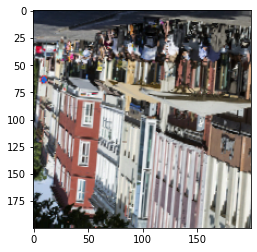

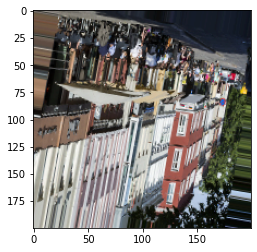

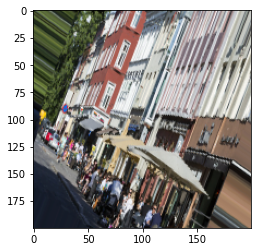

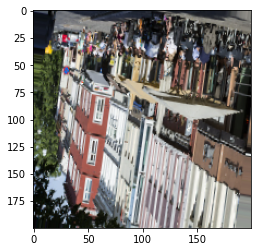

In [293]:
import keras
import tensorflow as tf


example_Image = Train_Data["JPG"][99]
Load_Image =  keras.utils.load_img(example_Image,target_size=(200,200))
Array_Image =  keras.utils.img_to_array(Load_Image)
Array_Image = Array_Image.reshape((1,) + Array_Image.shape)

i = 0
for batch in Train_Generator.flow(Array_Image,batch_size=1):
    plt.figure(i)
    IMG = plt.imshow( keras.utils.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

## Applying Generator

In [294]:
Train_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=Train_Data,
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="categorical",
                                                   batch_size=32,
                                                   subset="training")

Found 1963 validated image filenames belonging to 2 classes.


In [295]:
Validation_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=Train_Data,
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="categorical",
                                                   batch_size=32,
                                                   subset="validation")

Found 218 validated image filenames belonging to 2 classes.


In [296]:
Test_IMG_Set = Test_Generator.flow_from_dataframe(dataframe=Test_Data,
                                                 x_col="JPG",
                                                 y_col="CATEGORY",
                                                 color_mode="rgb",
                                                 class_mode="categorical",
                                                 batch_size=32)

Found 243 validated image filenames belonging to 2 classes.


## Checking if it works 

In [297]:
for data_batch,label_batch in Train_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 256, 256, 3)
LABEL SHAPE:  (32, 2)


In [298]:
for data_batch,label_batch in Validation_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 256, 256, 3)
LABEL SHAPE:  (32, 2)


In [299]:
for data_batch,label_batch in Validation_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 256, 256, 3)
LABEL SHAPE:  (32, 2)


In [300]:
print("TRAIN: ")
print(Train_IMG_Set.class_indices)
print(Train_IMG_Set.classes[0:5])
print(Train_IMG_Set.image_shape)
print("---"*20)
print("VALIDATION: ")
print(Validation_IMG_Set.class_indices)
print(Validation_IMG_Set.classes[0:5])
print(Validation_IMG_Set.image_shape)
print("---"*20)
print("TEST: ")
print(Test_IMG_Set.class_indices)
print(Test_IMG_Set.classes[0:5])
print(Test_IMG_Set.image_shape)

TRAIN: 
{'Fire': 0, 'NoFire': 1}
[1, 1, 1, 0, 1]
(256, 256, 3)
------------------------------------------------------------
VALIDATION: 
{'Fire': 0, 'NoFire': 1}
[1, 1, 1, 1, 1]
(256, 256, 3)
------------------------------------------------------------
TEST: 
{'Fire': 0, 'NoFire': 1}
[1, 1, 0, 1, 0]
(256, 256, 3)


## CNN 


In [301]:
Model = Sequential()

Model.add(Conv2D(32,(3,3),activation="relu",
                 input_shape=(256,256,3)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2)))

#
Model.add(Conv2D(64,(3,3),
                 activation="relu",padding="same"))
Model.add(Dropout(0.2))
Model.add(MaxPooling2D((2,2)))

#
Model.add(Conv2D(128,(3,3),
                 activation="relu",padding="same"))
Model.add(Dropout(0.5))
Model.add(MaxPooling2D((2,2)))


#
Model.add(Flatten())
Model.add(Dense(256,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(2,activation="sigmoid"))

In [302]:
Call_Back = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=5,mode="min")

In [303]:
Model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [304]:
import os
from PIL import Image
folder_path = '..\cours\dataset'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

UnidentifiedImageError: cannot identify image file '..\\cours\\dataset\\NoFire\\nofire650.jpg'

In [305]:
CNN_Model = Model.fit(Train_IMG_Set,
                      validation_data=Validation_IMG_Set,
                            callbacks=Call_Back,
                      epochs=12)

Epoch 1/12
55/62 [=========================>....] - ETA: 21s - loss: 2.7488 - accuracy: 0.6947

UnknownError: Graph execution error:

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000015280499950>
Traceback (most recent call last):

  File "C:\Users\33658\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\ops\script_ops.py", line 270, in __call__
    ret = func(*args)

  File "C:\Users\33658\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\33658\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 1030, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "C:\Users\33658\AppData\Roaming\Python\Python38\site-packages\keras\engine\data_adapter.py", line 831, in wrapped_generator
    for data in generator_fn():

  File "C:\Users\33658\AppData\Roaming\Python\Python38\site-packages\keras\engine\data_adapter.py", line 957, in generator_fn
    yield x[i]

  File "C:\Users\33658\AppData\Roaming\Python\Python38\site-packages\keras\preprocessing\image.py", line 110, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "C:\Users\33658\AppData\Roaming\Python\Python38\site-packages\keras\preprocessing\image.py", line 337, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "C:\Users\33658\AppData\Roaming\Python\Python38\site-packages\keras\utils\image_utils.py", line 394, in load_img
    img = pil_image.open(io.BytesIO(f.read()))

  File "C:\Users\33658\anaconda3\lib\site-packages\PIL\Image.py", line 2930, in open
    raise UnidentifiedImageError(

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000015280499950>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_23091]

In [244]:
print(Model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 127, 127, 64)      18496     
                                                                 
 dropout_13 (Dropout)        (None, 127, 127, 64)      0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 63, 63, 64)      

In [245]:
Model_Results = Model.evaluate(Test_IMG_Set)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

8/8 [==============================] - 9s 1s/step - loss: 0.5307 - accuracy: 0.7942
LOSS:  0.5307
ACCURACY:  0.79


No handles with labels found to put in legend.


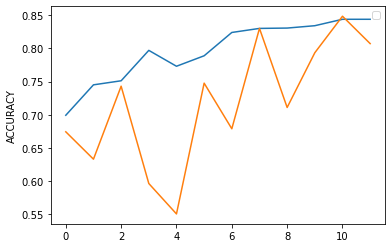

In [246]:
plt.plot(CNN_Model.history["accuracy"])
plt.plot(CNN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

No handles with labels found to put in legend.


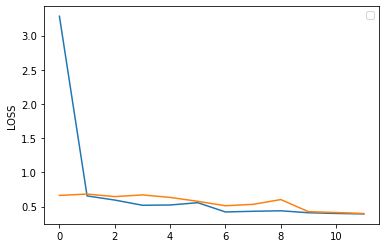

In [247]:
plt.plot(CNN_Model.history["loss"])
plt.plot(CNN_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

No handles with labels found to put in legend.


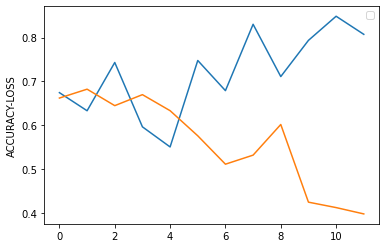

In [248]:
plt.plot(CNN_Model.history["val_accuracy"])
plt.plot(CNN_Model.history["val_loss"])
plt.ylabel("ACCURACY-LOSS")
plt.legend()
plt.show()

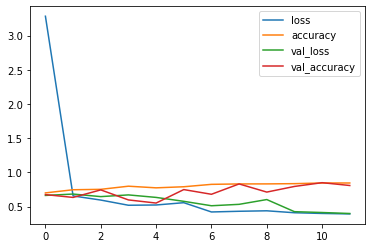

In [249]:
Dict_Summary_One = pd.DataFrame(CNN_Model.history)
Dict_Summary_One.plot()

In [250]:
Prediction_One = Model.predict(Test_IMG_Set)
Prediction_One = Prediction_One.argmax(axis=-1)

8/8 [==============================] - 10s 1s/step


In [251]:
print(Prediction_One)

[1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1
 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0
 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1
 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0]


In [252]:
Predict_Class = Model.predict(Test_IMG_Set)
Predict_Class = (Model.predict(Test_IMG_Set) > 0.5).astype("int32")

8/8 [==============================] - 9s 1s/step


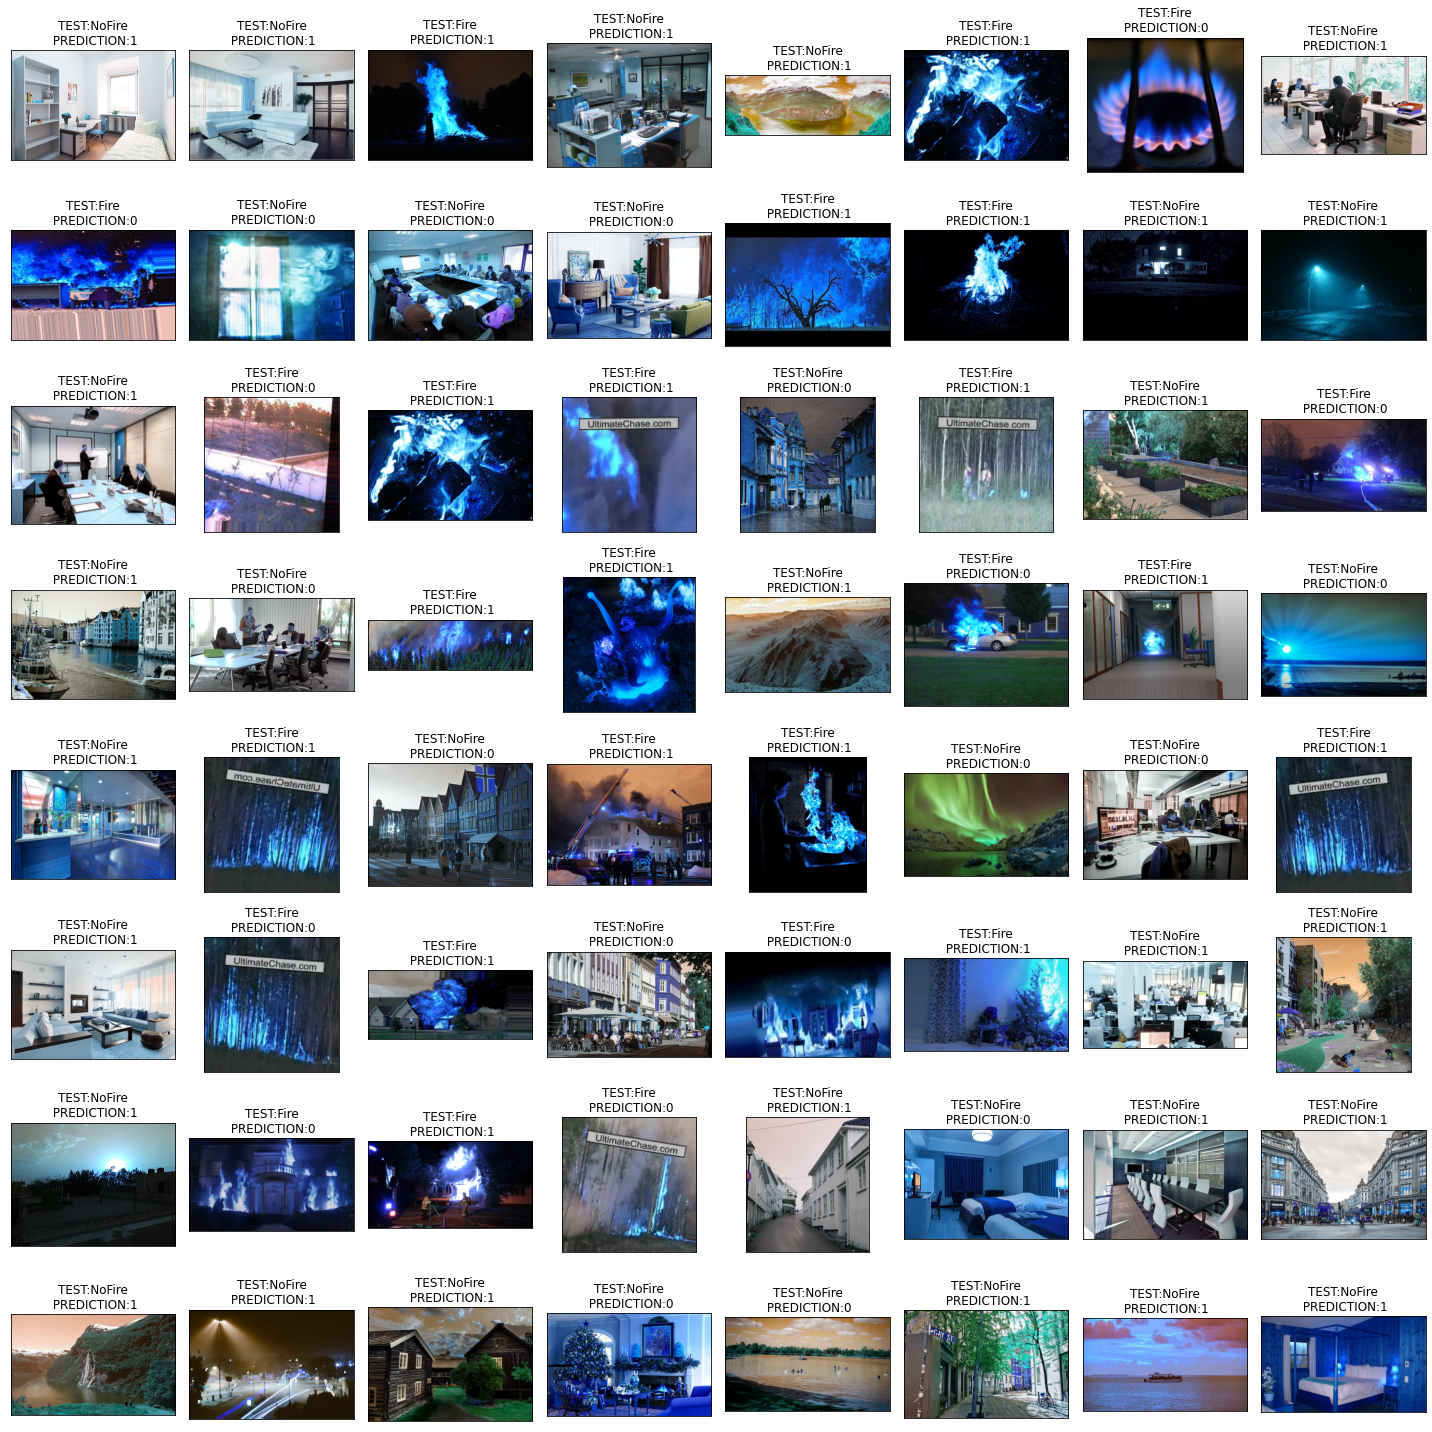

In [253]:
fig, axes = plt.subplots(nrows=8,
                         ncols=8,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(cv2.imread(Test_Data["JPG"].iloc[i]))
    ax.set_title(f"TEST:{Test_Data.CATEGORY.iloc[i]}\n PREDICTION:{Prediction_One[i]}")
plt.tight_layout()
plt.show()

In [258]:
print(confusion_matrix(For_Prediction_Class,Prediction_One))

[[40 80]
 [40 83]]


In [256]:
image_path = "../cours/Test_Dataset/NoFire/nofiresamp1_frame50.jpg"
img = keras.utils.load_img(image_path,target_size=(256,256))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x,axis=0)

In [257]:
Diff_Pred = Model.predict(x)
Diff_Pred = Diff_Pred.argmax(axis=-1)
print(Diff_Pred)

1/1 [==============================] - 0s 95ms/step
[1]


## Fully connected 

In [135]:
Model_Two = tf.keras.models.Sequential([
  # inputs 
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Flatten(input_shape=(32,256,256,3)),
  # hiddens layers
  tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  # output layer
  tf.keras.layers.Dense(2,activation="softmax")
])

In [136]:
Model_Two.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [141]:
ANN_Model = Model_Two.fit(Train_IMG_Set,
                          validation_data=Validation_IMG_Set,
                          callbacks=Call_Back,
                      epochs=15)

Epoch 1/15
62/62 [==============================] - 73s 1s/step - loss: 0.5229 - accuracy: 0.7273 - val_loss: 0.5242 - val_accuracy: 0.7477
Epoch 2/15
62/62 [==============================] - 70s 1s/step - loss: 0.5118 - accuracy: 0.7401 - val_loss: 0.5086 - val_accuracy: 0.7798
Epoch 3/15
62/62 [==============================] - 79s 1s/step - loss: 0.5144 - accuracy: 0.7411 - val_loss: 0.4937 - val_accuracy: 0.7661
Epoch 4/15
62/62 [==============================] - 79s 1s/step - loss: 0.5236 - accuracy: 0.7375 - val_loss: 0.5112 - val_accuracy: 0.7248
Epoch 5/15
62/62 [==============================] - 79s 1s/step - loss: 0.5028 - accuracy: 0.7523 - val_loss: 0.4961 - val_accuracy: 0.7615
Epoch 6/15
62/62 [==============================] - 76s 1s/step - loss: 0.5166 - accuracy: 0.7446 - val_loss: 0.5006 - val_accuracy: 0.7385
Epoch 7/15
62/62 [==============================] - 80s 1s/step - loss: 0.5085 - accuracy: 0.7508 - val_loss: 0.5072 - val_accuracy: 0.7477
Epoch 8/15
62/62 [==

In [138]:
print(Model_Two.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, None, None, None)  0         
                                                                 
 flatten_3 (Flatten)         (None, None)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               25165952  
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 2)                 130       
                                                                 
Total params: 25,174,338
Trainable params: 25,174,338


In [154]:
import optuna
import datetime

In [ ]:
parameters = {
        "LearningRate" : trial.suggest_loguniform('LearningRate', 1e-3, 1e-2),
        # "Optimizer" : trial.suggest_categorical('Optimizer',["Adam", "Adadelta", "Adagrad", "ASGD", "RMSprop", "Rprop", "SGD", "Adamax", "AdamW"]),
        "Optimizer" : trial.suggest_categorical('Optimizer',["Adam", "Adamax"]),
        "HiddenFeatures" :trial.suggest_int('HiddenFeatures',5, 40),
        "n_layers": trial.suggest_int('n_layers', 3, 6),
        "dropout": trial.suggest_loguniform('dropout',0.3 , 0.6),
        "epochs": trial.suggest_int('epochs',5,10),
        "activation_function": trial.suggest_categorical('activation_function',["ReLU", "Tanh"]),
        "batch_size": trial.suggest_int('batch_size',1,20)
    }

## Optuna